## 1. Impport Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

## 2. Load Data using Tensorflow API

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("Training set:", x_train.shape, y_train.shape)
print("Test set:", x_test.shape, y_test.shape)

Training set: (60000, 28, 28) (60000,)
Test set: (10000, 28, 28) (10000,)


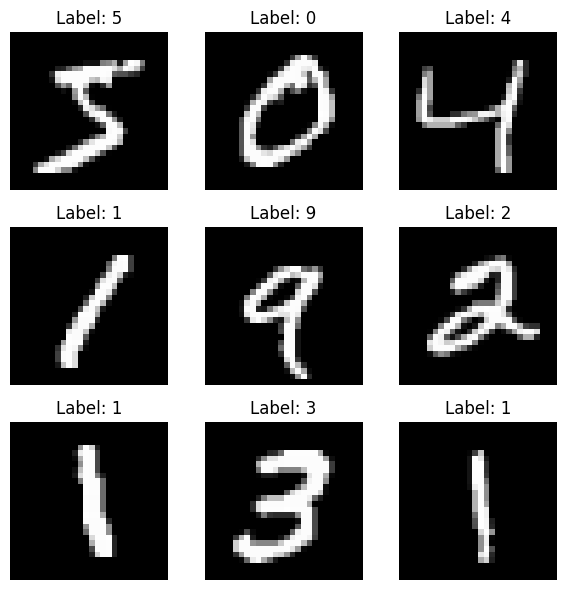

In [4]:
# Plot the first 9 images from the training set
plt.figure(figsize=(6,6))
for i in range(9):
    # define subplot (3x3 grid)
    plt.subplot(3, 3, i + 1)
    # plot raw pixel data
    plt.imshow(x_train[i], cmap='gray')
    # show the corresponding label as title
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

# show the figure
plt.tight_layout()
plt.show()

## 3. Data Preprocessing

In [5]:
#Normalize pixel values (0–255 → 0–1)

x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

In [6]:
#Split training and validation data
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    x_train,  y_train, test_size=0.1, random_state=42
)

print("Training set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Test set:", x_test.shape)

Training set: (54000, 28, 28)
Validation set: (6000, 28, 28)
Test set: (10000, 28, 28)


In [7]:
data_augmentation = Sequential([
    layers.RandomRotation(0.1),        # ~rotation_range=10
    layers.RandomZoom(0.1),            # ~zoom_range=0.1
    layers.RandomTranslation(0.1, 0.1),# ~width_shift_range=0.1, height_shift_range=0.1
])

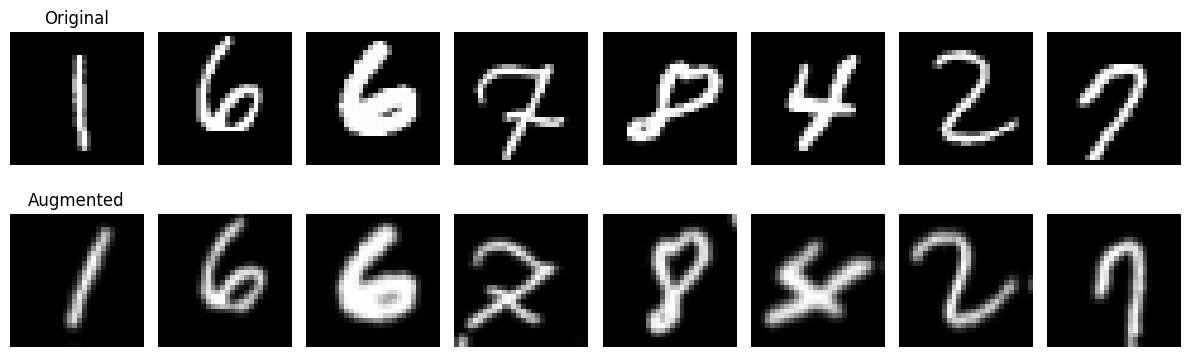

In [8]:
#Examples of Augmentation
num_examples = 8  # how many different images to show

# pick `num_examples` different images from X_train
orig_batch = X_train[:num_examples].astype('float32')  # shape (N, 28, 28)
orig_batch = np.expand_dims(orig_batch, axis=-1)       # -> (N, 28, 28, 1)

# convert to tensor and augment (training=True to force randomness)
orig_tensor = tf.convert_to_tensor(orig_batch)
augmented = data_augmentation(orig_tensor, training=True)

plt.figure(figsize=(12, 4))
for i in range(num_examples):
    # original
    plt.subplot(2, num_examples, i + 1)
    plt.imshow(orig_batch[i].squeeze(), cmap='gray')
    if i == 0: plt.title("Original")
    plt.axis('off')

    # augmented
    plt.subplot(2, num_examples, i + 1 + num_examples)
    plt.imshow(augmented[i].numpy().squeeze(), cmap='gray')
    if i == 0: plt.title("Augmented")
    plt.axis('off')

plt.tight_layout()
plt.show()

## 3. Model Definition and Compilation

In [9]:
# Define the model
model = keras.Sequential([
    layers.Input(shape=(28, 28)),
    layers.Reshape((28, 28, 1)),
    # Apply data augmentation
    data_augmentation,
    
    # Convolutional layers
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.2),

    # Fully connected layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 4. Model Training

In [10]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(X_val, y_val)
)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 28s 61ms/step - accuracy: 0.7831 - loss: 0.6755 - val_accuracy: 0.9673 - val_loss: 0.1116
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 30s 72ms/step - accuracy: 0.9183 - loss: 0.2671 - val_accuracy: 0.9703 - val_loss: 0.0913
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 36s 86ms/step - accuracy: 0.9414 - loss: 0.1914 - val_accuracy: 0.9800 - val_loss: 0.0667
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 24s 58ms/step - accuracy: 0.9523 - loss: 0.1547 - val_accuracy: 0.9813 - val_loss: 0.0640
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 26s 62ms/step - accuracy: 0.9572 - loss: 0.1386 - val_accuracy: 0.9803 - val_loss: 0.0671
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 61ms/step - accuracy: 0.9636 - loss: 0.1182 - val_accuracy: 0.9857 - val_loss: 0.0520
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 27s 64ms/step - accuracy: 0.9665 - loss: 0.1097 - val_accuracy: 0.9827 - val_loss: 0.0564
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 28s 67ms/step - accuracy: 0.9683 - loss: 0.1037 - 

## 5. Ploting accuracy and loss 

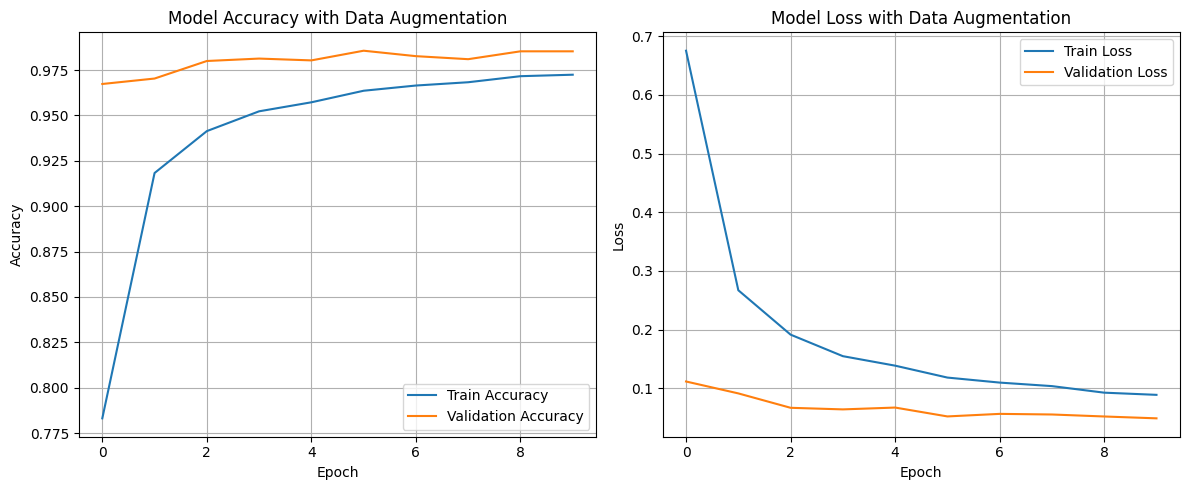

In [11]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy with Data Augmentation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss with Data Augmentation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

## 6. Evaluation

In [12]:
# Evaluate on the test set
print("\nMODEL EVALUATION:")
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'test set accuracy: {test_accuracy}')
print(f'test set loss: {test_loss}')


MODEL EVALUATION:
test set accuracy: 0.9866999983787537
test set loss: 0.04231938347220421
